In [13]:
import sys
from pathlib import Path
import os

current_dir = Path.cwd()
project_dir = current_dir.parent
sys.path.append(str(project_dir))

from settings import KEY_ANNOTATED_ARTICLES_FILE

import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns 

# Load the annotated articles from the JSON file
annotated_articles = pd.read_json(KEY_ANNOTATED_ARTICLES_FILE)

# Витягнення дати публікації з назви файлу та перетворення її на об'єкт datetime
annotated_articles['publication_date'] = pd.to_datetime(annotated_articles['filename'].str[:8], format='%Y%m%d')
annotated_articles['sentiment_ukraine'] = annotated_articles['sentiment_ukraine'].astype(float)
annotated_articles['propaganda'] = annotated_articles['propaganda'].apply(lambda x: True if x == 'Present' else False)

# Extract aspects into separate columns
aspects = ['Military Support', 'Humanitarian Aid', 'Diplomacy', 'Political Stability', 'Economic Effects']
for aspect in aspects:
    annotated_articles[aspect] = annotated_articles['aspects'].apply(lambda x: x.get(aspect))

In [10]:
# Define key events
key_events = {
    '2022-02-24': 'Start of Russian Invasion',
    '2022-04-02': 'Bucha Massacre Discovered',
    '2022-09-06': 'Ukrainian Counteroffensive in Kharkiv',
    '2023-02-20': 'Russian Offensive in Eastern Ukraine',
    '2023-07-01': 'Ukraine Joins NATO',
    '2022-03-15': 'Sanctions Law Against Russia',
    '2022-06-26': 'G7 Leaders Meeting on Ukraine',
    '2023-03-10': 'Military Aid Agreement Signed'
}

def add_key_events(ax, key_events):
    for date, event in key_events.items():
        ax.axvline(pd.to_datetime(date), color='gray', linestyle='--')
        ax.text(pd.to_datetime(date), ax.get_ylim()[1], event, rotation=90, verticalalignment='top', fontsize=8, color='gray')


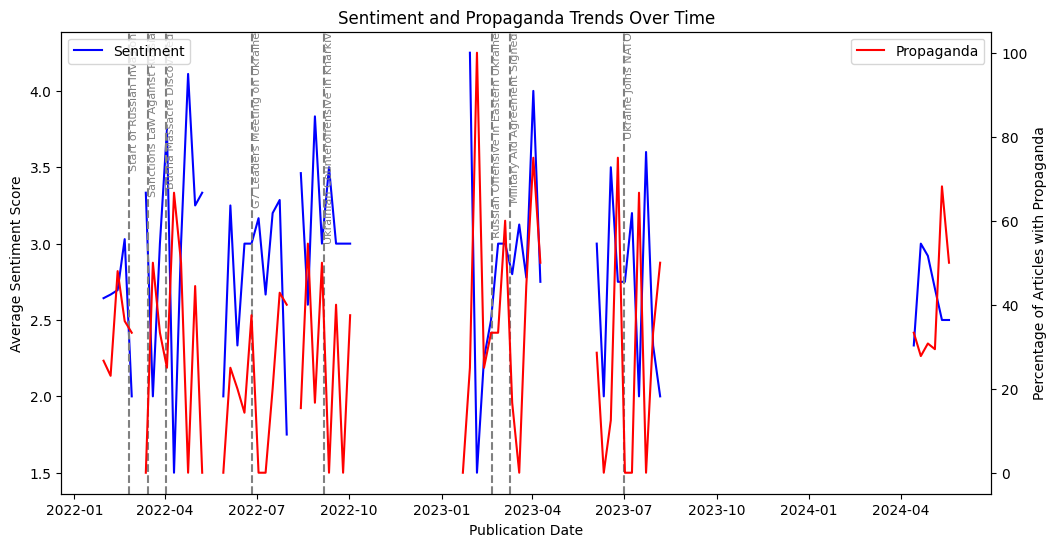

In [11]:
def plot_sentiment_propaganda_trends(annotated_articles, key_events):
    sentiment_over_time = annotated_articles.groupby(pd.Grouper(key='publication_date', freq='W'))['sentiment_ukraine'].mean()
    propaganda_over_time = annotated_articles.groupby(pd.Grouper(key='publication_date', freq='W'))['propaganda'].mean() * 100

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()

    ax1.plot(sentiment_over_time.index, sentiment_over_time.values, color='blue', label='Sentiment')
    ax1.set_xlabel('Publication Date')
    ax1.set_ylabel('Average Sentiment Score')
    ax1.legend(loc='upper left')

    ax2.plot(propaganda_over_time.index, propaganda_over_time.values, color='red', label='Propaganda')
    ax2.set_ylabel('Percentage of Articles with Propaganda')
    ax2.legend(loc='upper right')

    add_key_events(ax1, key_events)

    plt.title('Sentiment and Propaganda Trends Over Time')
    plt.show()

plot_sentiment_propaganda_trends(annotated_articles, key_events)


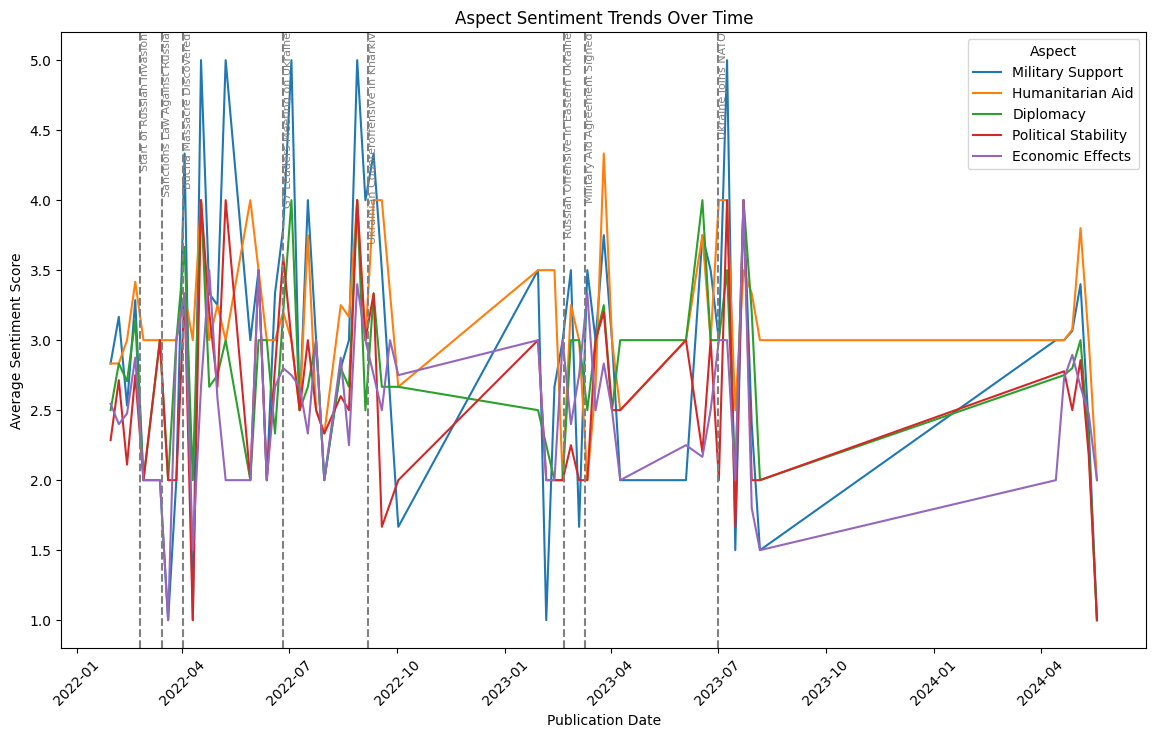

In [15]:
# Plot Aspect Sentiment Trends Over Time
def plot_aspect_sentiment_trends(annotated_articles, key_events):
    aspects = ['Military Support', 'Humanitarian Aid', 'Diplomacy', 'Political Stability', 'Economic Effects']
    
    plt.figure(figsize=(14, 8))
    for aspect in aspects:
        aspect_sentiment = annotated_articles.groupby(pd.Grouper(key='publication_date', freq='W'))[aspect].mean()
        sns.lineplot(data=aspect_sentiment, label=aspect)
    
    plt.xlabel('Publication Date')
    plt.ylabel('Average Sentiment Score')
    plt.title('Aspect Sentiment Trends Over Time')
    
    add_key_events(plt.gca(), key_events)
    
    plt.legend(title='Aspect')
    plt.xticks(rotation=45)
    plt.show()

plot_aspect_sentiment_trends(annotated_articles, key_events)